# Cataract Classifier
Dataset from Kaggle.

### Importing modules

In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import random
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [62]:
BATCH_SIZE = 32
WIDTH = 256
HEIGHT = 256

### Dataset exploration

#### Viewing train and test images

In [4]:
main_dir = "processed_images/"
train_dir = main_dir + "train/"
test_dir = main_dir + "test/"

In [49]:
# Function to get a random image path from the directory
def get_random_image_path(folder_path):
    images = os.listdir(folder_path)
    rand_index = random.randint(0, len(images) - 1)
    return os.path.join(folder_path, images[rand_index])

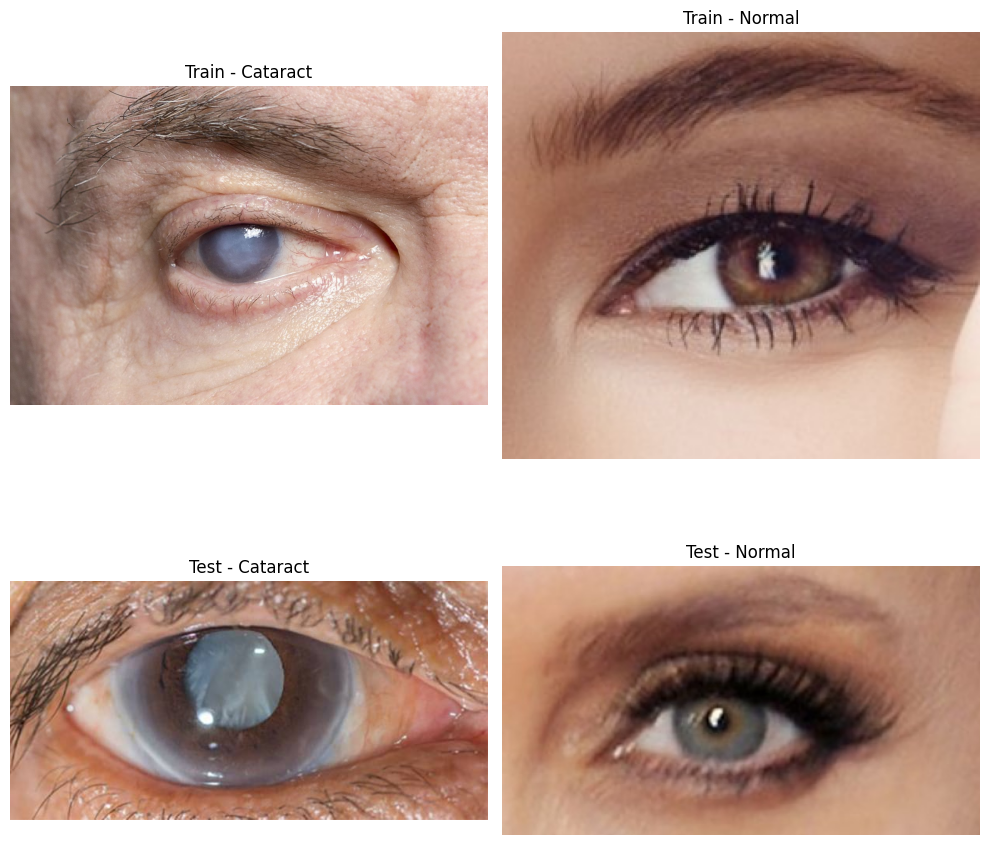

In [61]:
# Get paths for one cataract and one normal image from train and test sets
train_cataract_img_path = get_random_image_path(train_dir + 'cataract')
train_normal_img_path = get_random_image_path(train_dir + 'normal')
test_cataract_img_path = get_random_image_path(test_dir + 'cataract')
test_normal_img_path = get_random_image_path(test_dir + 'normal')

# Displaying the images along with their labels
plt.figure(figsize=(10, 10))

# Train cataract image
plt.subplot(221)
train_cataract_img = Image.open(train_cataract_img_path)
plt.imshow(train_cataract_img)
plt.title('Train - Cataract')
plt.axis('off')

# Train normal image
plt.subplot(222)
train_normal_img = Image.open(train_normal_img_path)
plt.imshow(train_normal_img)
plt.title('Train - Normal')
plt.axis('off')

# Test cataract image
plt.subplot(223)
test_cataract_img = Image.open(test_cataract_img_path)
plt.imshow(test_cataract_img)
plt.title('Test - Cataract')
plt.axis('off')

# Test normal image
plt.subplot(224)
test_normal_img = Image.open(test_normal_img_path)
plt.imshow(test_normal_img)
plt.title('Test - Normal')
plt.axis('off')

plt.tight_layout()
plt.show()

### Data preprocessing

#### Image augmentation

In [25]:
image_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.15,
                                   zoom_range=0.15)

#### Loading images

In [29]:
train_datagen = image_datagen.flow_from_directory(train_dir,
                                                  target_size=(WIDTH, HEIGHT),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='binary',
                                                  shuffle=True)

test_datagen = image_datagen.flow_from_directory(test_dir,
                                                 target_size=(WIDTH, HEIGHT),
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='binary',
                                                 shuffle=False)



Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [8]:
train_datagen.class_indices

{'cataract': 0, 'normal': 1}

### Model creation

#### Defining model

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [36]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 60, 60, 64)       

#### Training model

In [37]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_datagen,
                    epochs=50,
                    validation_data=test_datagen)

Epoch 1/50
16/16 [==============================] - 22s 1s/step - loss: 0.6990 - accuracy: 0.5112 - val_loss: 0.6928 - val_accuracy: 0.5124
Epoch 2/50
16/16 [==============================] - 16s 1s/step - loss: 0.6909 - accuracy: 0.5295 - val_loss: 0.6907 - val_accuracy: 0.5041
Epoch 3/50
16/16 [==============================] - 16s 1s/step - loss: 0.6881 - accuracy: 0.5458 - val_loss: 0.6831 - val_accuracy: 0.6446
Epoch 4/50
16/16 [==============================] - 16s 1s/step - loss: 0.6625 - accuracy: 0.5967 - val_loss: 0.6485 - val_accuracy: 0.6942
Epoch 5/50
16/16 [==============================] - 16s 1s/step - loss: 0.6132 - accuracy: 0.6802 - val_loss: 0.6127 - val_accuracy: 0.6446
Epoch 6/50
16/16 [==============================] - 16s 1s/step - loss: 0.5745 - accuracy: 0.6945 - val_loss: 0.5578 - val_accuracy: 0.6860
Epoch 7/50
16/16 [==============================] - 16s 997ms/step - loss: 0.5955 - accuracy: 0.6925 - val_loss: 0.5903 - val_accuracy: 0.7190
Epoch 8/50
16/16 

### Model evaluation

#### Seeing model train history

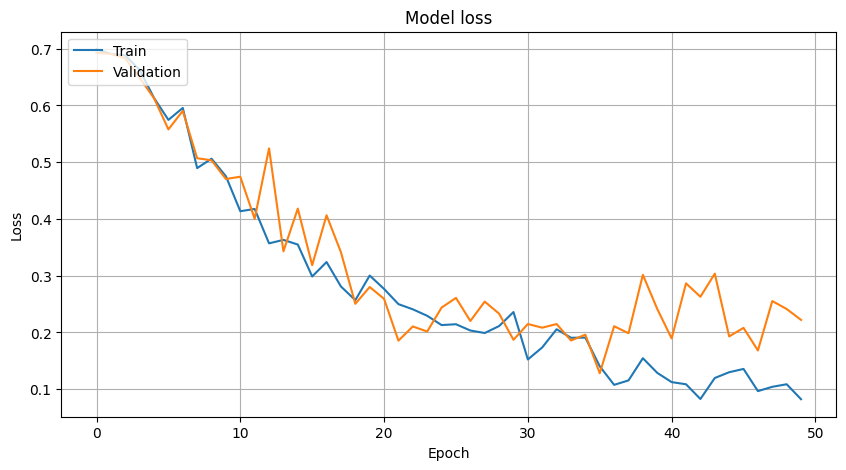

In [40]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.grid(True)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

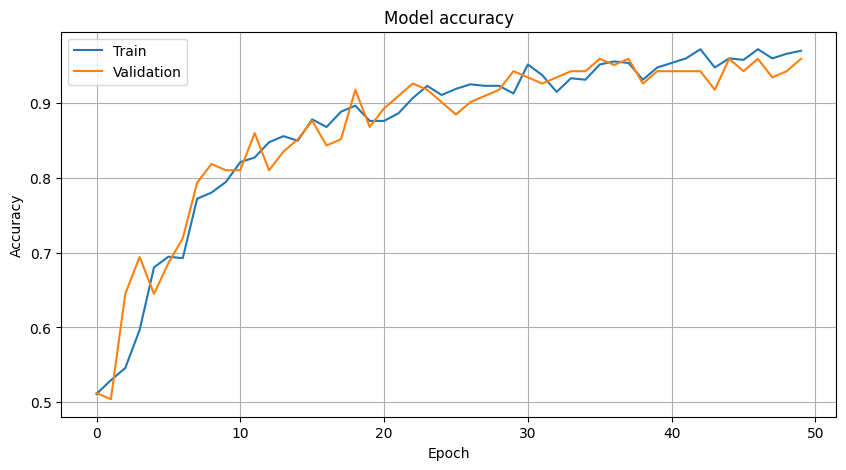

In [42]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

#### Testing the model

In [97]:
def predict_image(image_path, target_size=(WIDTH, HEIGHT)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    predictions = model.predict(img)

    # Convert prediction to label
    if predictions[0] < 0.5:
        return "Cataract"
    else:
        return "Normal"

# Function to display image and prediction
def display_image_with_prediction(image_path, original_image, prediction):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f"Image: {original_image}\nPrediction: {prediction}")
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 17ms/step


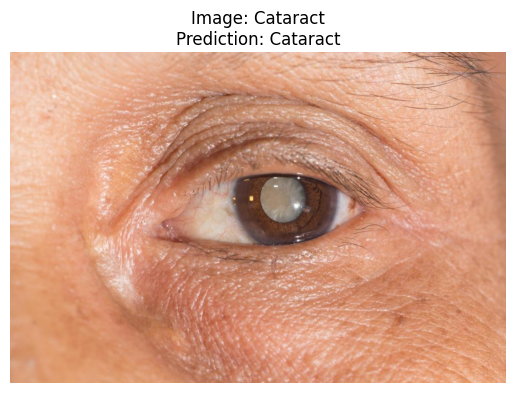

In [106]:
# Make predictions on random cataract image and display
test_cataract_img_path = get_random_image_path(test_dir + 'cataract')
prediction_cataract = predict_image(test_cataract_img_path)
display_image_with_prediction(test_cataract_img_path, "Cataract", prediction_cataract)

1/1 [==============================] - 0s 16ms/step


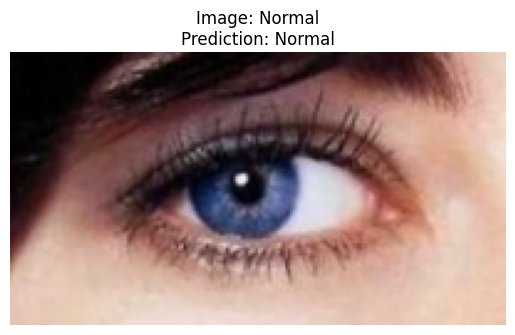

In [104]:
# Make predictions on random normal image and display
test_normal_img_path = get_random_image_path(test_dir + 'normal')
prediction_normal = predict_image(test_normal_img_path)
display_image_with_prediction(test_normal_img_path, "Normal", prediction_normal)

#### Model saving

In [38]:
model.save('test_model.h5')

c:\Users\rjsec\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
